In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Model stuff #
from sklearn.model_selection import train_test_split

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
import pandas as pd
diamonds = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')
print(diamonds)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
diamonds.describe(include=np.object)

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [8]:
numcols=diamonds.select_dtypes(include = ['float64','int64']).columns.tolist()

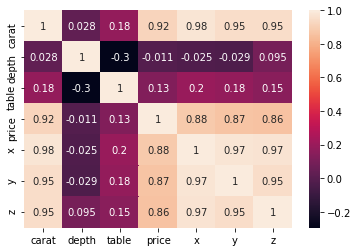

In [9]:
sns.heatmap(diamonds.corr(), annot=True)

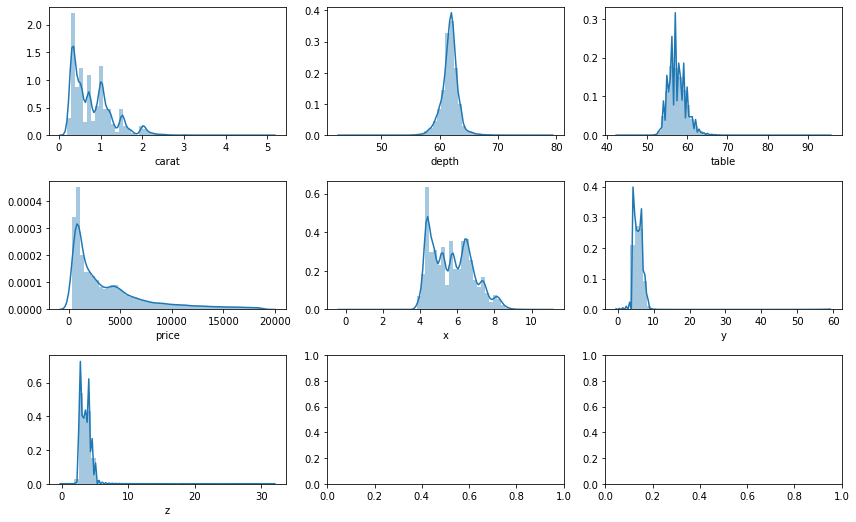

In [10]:
fig,axes = plt.subplots(3,3, figsize = (12,8)) # up to 9 quant vars
sns.distplot(diamonds["carat"], ax = axes[0,0])
sns.distplot(diamonds["depth"],  ax = axes[0,1])
sns.distplot(diamonds["table"],  ax = axes[0,2])
sns.distplot(diamonds["price"], ax = axes[1,0])
sns.distplot(diamonds["x"], ax = axes[1,1])
sns.distplot(diamonds["y"],  ax = axes[1,2])
sns.distplot(diamonds["z"], ax = axes[2,0])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

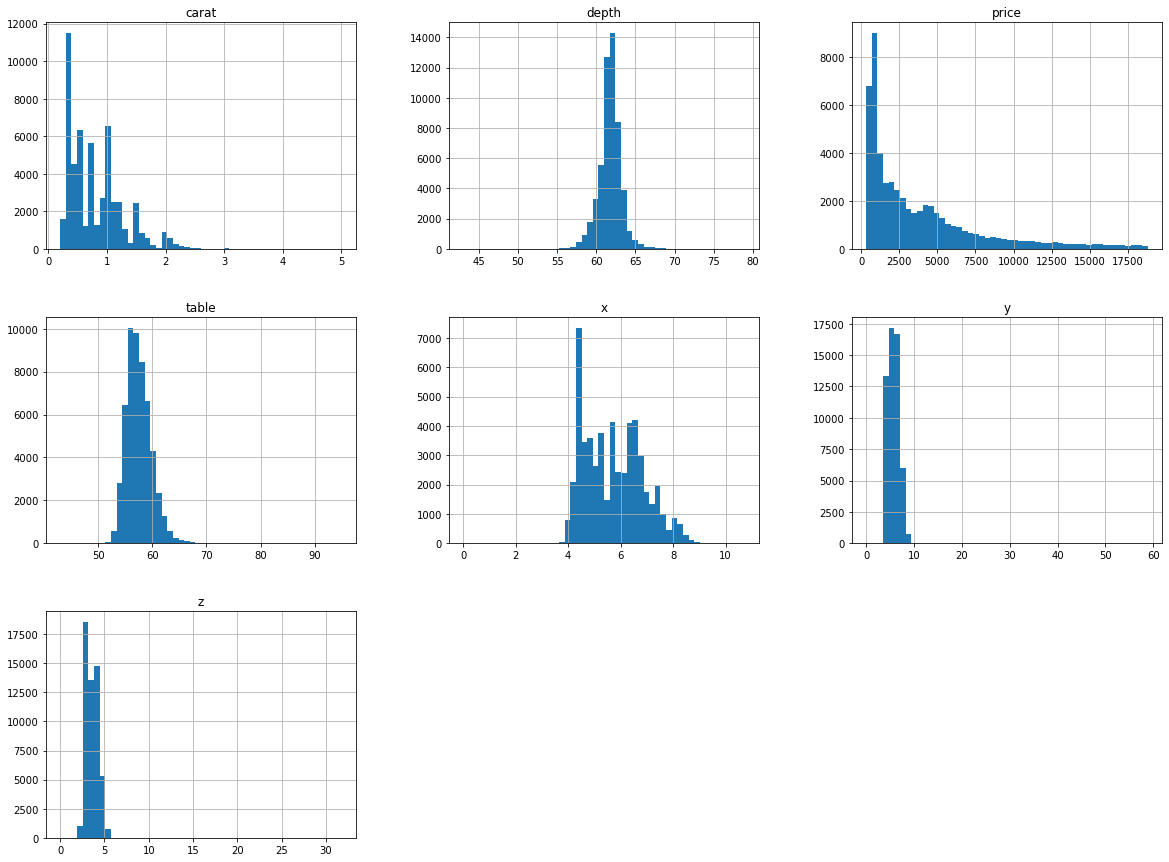

In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt
diamonds.hist(bins=50, figsize=(20,15))
plt.show()

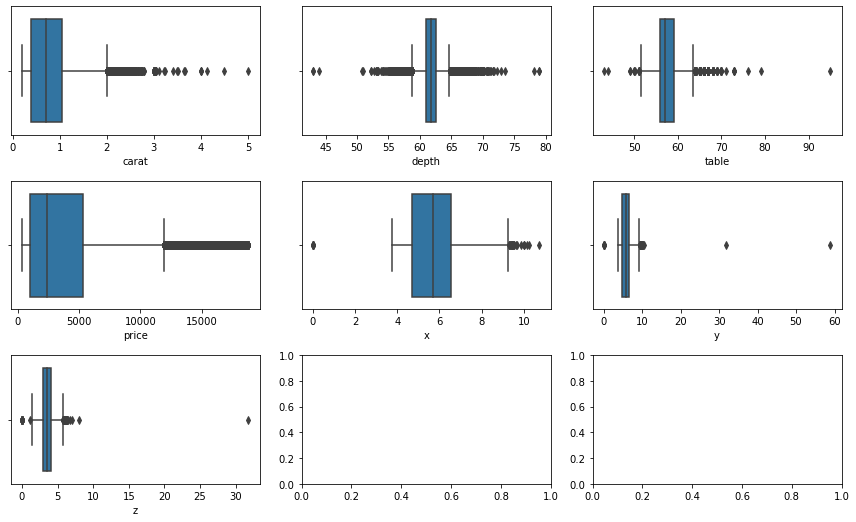

In [12]:
fig,axes = plt.subplots(3,3, figsize = (12,8)) # up to 9 quant vars
sns.boxplot(x= diamonds["carat"],   ax = axes[0,0])
sns.boxplot(x = diamonds["depth"],  ax = axes[0,1])
sns.boxplot(x = diamonds["table"],  ax = axes[0,2])
sns.boxplot(x = diamonds["price"],  ax = axes[1,0])
sns.boxplot(x = diamonds["x"],  ax = axes[1,1])
sns.boxplot(x = diamonds["y"],  ax = axes[1,2])
sns.boxplot(x = diamonds["z"],  ax = axes[2,0])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [13]:
zero_df = diamonds[(diamonds['x'] == 0) |
           (diamonds['y'] == 0) |
           (diamonds['z'] == 0)]
zero_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0


In [14]:
diamonds.drop(zero_df.index, inplace = True)

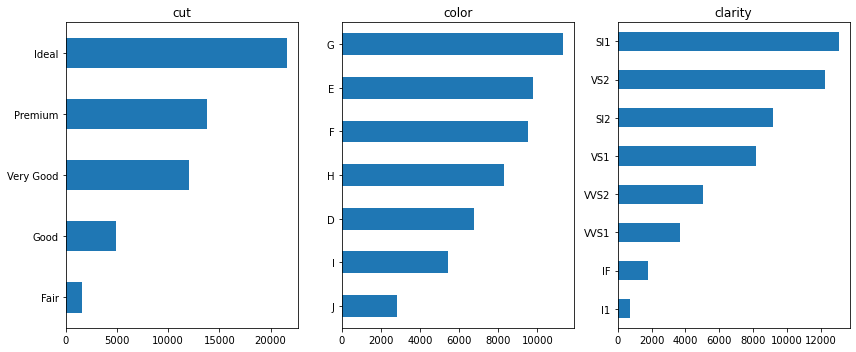

In [15]:
cat_vars = diamonds.select_dtypes(include = 'object').columns.tolist()
fig, axes = plt.subplots(1,3, figsize = (12,5))
i = 0
for var_name in cat_vars:
    diamonds[var_name].value_counts().sort_values().plot(kind = 'barh', color = 'C0', ax = axes[i])
    axes[i].set_title(var_name)
    i += 1
plt.tight_layout()
plt.show()

In [16]:
diamonds['volume']=diamonds['x']*diamonds['y']*diamonds['z']

In [17]:
train_df, test_df = train_test_split(diamonds, test_size=0.2, random_state=12)

In [18]:
Y_test = test_df['price']
X_test = test_df.drop('price', axis = 1)

In [19]:
print("Total dataset size: {}".format(diamonds.shape))
print("Training set size (80%): {}".format(train_df.shape))
print("Test set size (20%): {}".format(test_df.shape))

Total dataset size: (53920, 11)
Training set size (80%): (43136, 11)
Test set size (20%): (10784, 11)


In [20]:
diamonds.shape

(53920, 11)

In [21]:
train_df.shape

(43136, 11)

In [22]:
test_df.shape

(10784, 11)

In [23]:
dia = train_df.copy()

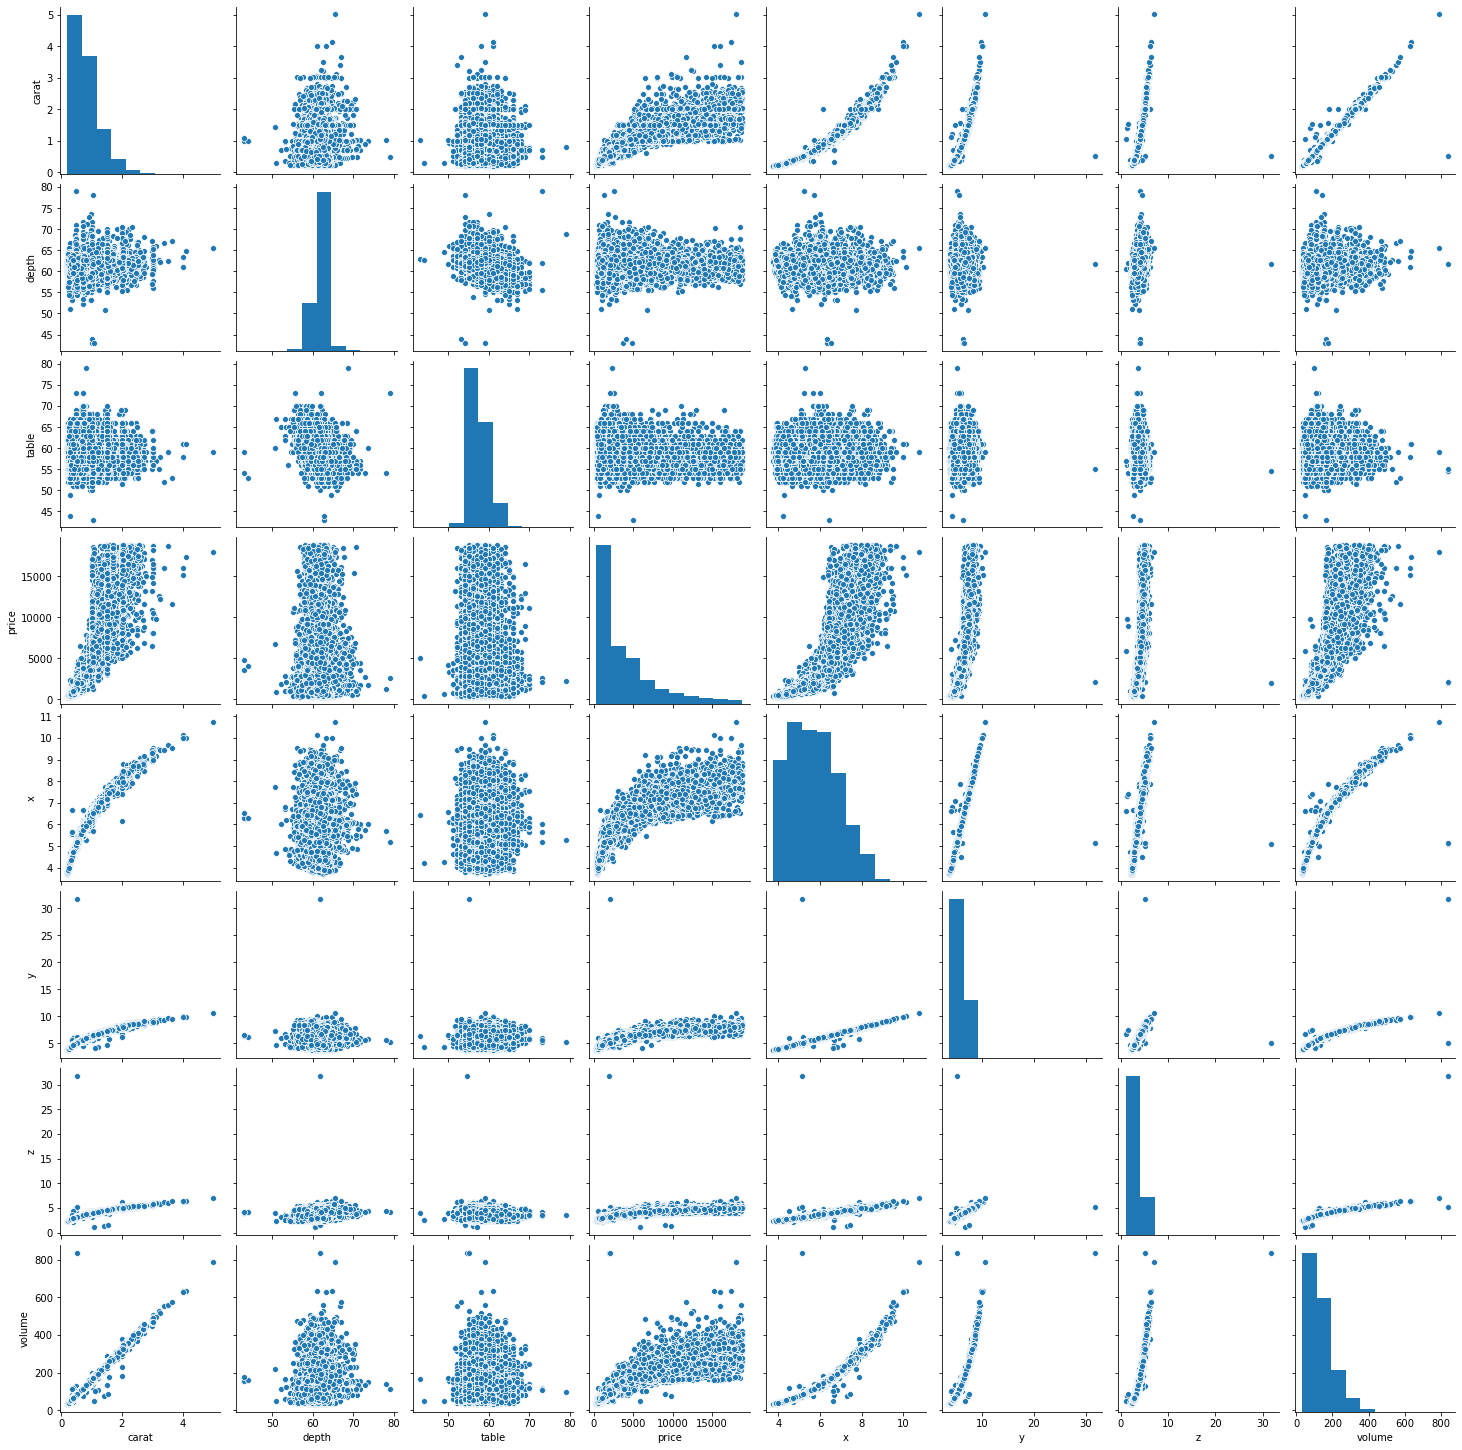

In [24]:
sns.pairplot(dia)
plt.show()

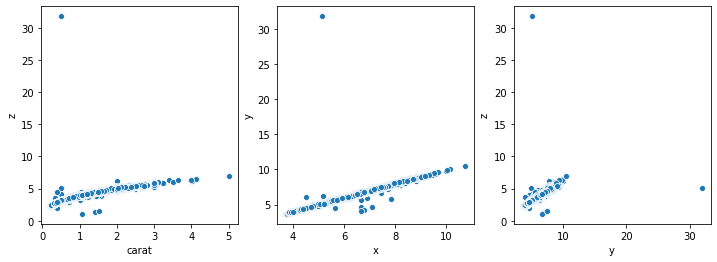

In [25]:
fig, axes = plt.subplots(1,3, figsize = (12,4))
sns.scatterplot(x = dia['carat'], y = dia['z'], ax = axes[0]) 
sns.scatterplot(x = dia['x'], y = dia['y'], ax = axes[1])
sns.scatterplot(x = dia['y'], y = dia['z'], ax = axes[2])

In [26]:
dia[dia['y'] > 20]

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12,838.5024


In [27]:
dia[dia['z'] > 20]

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8,838.5024


In [28]:
cond = (dia['y'] > 20) | (dia['z'] > 20) 
dia.drop(dia[cond].index, inplace = True)

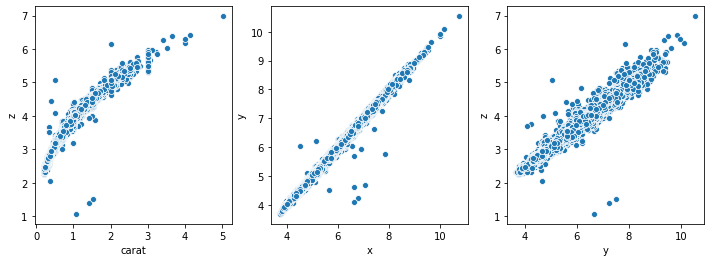

In [29]:
fig, axes = plt.subplots(1,3, figsize = (12,4))
sns.scatterplot(x = dia['carat'], y = dia['z'], ax = axes[0]) 
sns.scatterplot(x = dia['x'], y = dia['y'], ax = axes[1])
sns.scatterplot(x = dia['y'], y = dia['z'], ax = axes[2])

In [30]:
dia.corr()

,carat,depth,table,price,x,y,z,volume
carat,1.000000,0.028167,0.183077,0.922108,0.977832,0.976872,0.976289,0.998936
depth,0.028167,1.000000,-0.301143,-0.011666,-0.024660,-0.027841,0.096703,0.010689
table,0.183077,-0.301143,1.000000,0.129721,0.197536,0.191395,0.156704,0.173803
price,0.922108,-0.011666,0.129721,1.000000,0.887672,0.889255,0.882216,0.924058
x,0.977832,-0.024660,0.197536,0.887672,1.000000,0.998601,0.990939,0.978995
y,0.976872,-0.027841,0.191395,0.889255,0.998601,1.000000,0.990593,0.978567
z,0.976289,0.096703,0.156704,0.882216,0.990939,0.990593,1.000000,0.975924
volume,0.998936,0.010689,0.173803,0.924058,0.978995,0.978567,0.975924,1.000000


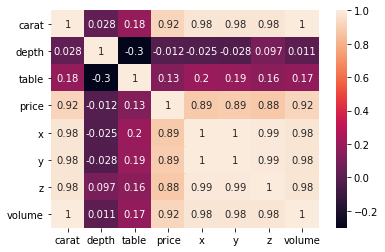

In [31]:
sns.heatmap(dia.corr(), annot=True)

In [32]:
dia.drop(['x','y','z'], axis = 1, inplace = True)

In [33]:
clar_order = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = sorted(dia['color'].unique().tolist(), reverse = True)

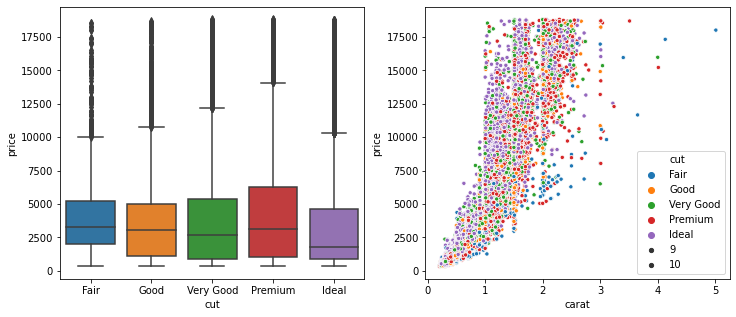

In [34]:
fig, axes = plt.subplots(1,2, figsize = (12,5))
sns.boxplot(x = "cut", y = "price", data = dia, order = cut_order, ax = axes[0])
sns.scatterplot(x = 'carat', y = 'price', hue = "cut", hue_order = cut_order,
                size = 10, data = dia, ax = axes[1])

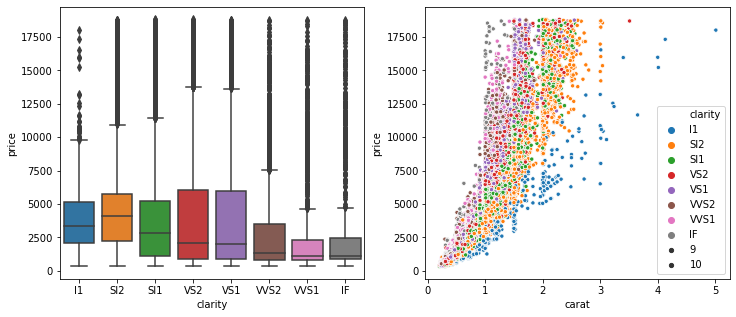

In [35]:
fig, axes = plt.subplots(1,2, figsize = (12,5))
sns.boxplot(x = 'clarity', y = 'price', data = dia, order = clar_order, ax = axes[0])
sns.scatterplot(x = 'carat', y = 'price', hue = "clarity", hue_order = clar_order,
                size = 10, data = dia, ax = axes[1])

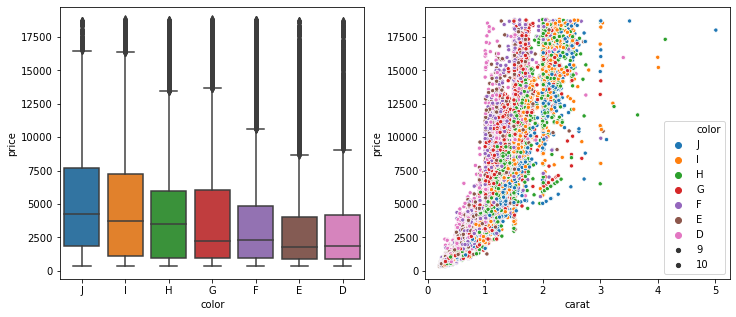

In [36]:
fig, axes = plt.subplots(1,2, figsize = (12,5))
sns.boxplot(x = "color", y = "price", data = dia, order = color_order, ax = axes[0])
sns.scatterplot(x = 'carat', y = 'price', hue = "color", hue_order = color_order,
                size = 10, data = dia, ax = axes[1])

In [37]:
def error_metrics(y_true, y_pred):
    mean_abs = "Mean Absolute Error: {}".format(mean_absolute_error(y_true, y_pred))
    mean_squared = "Mean Square Error: {}".format(mean_squared_error(y_true, y_pred))
    mean_root="Root Mean Square Error: {}".format(np.sqrt(mean_squared_error(y_true, y_pred)))
    r2 = "r2 score: {}".format(r2_score(y_true, y_pred))
    return mean_abs, mean_squared, r2

In [38]:
X_train = dia.drop('price', axis = 1)
Y_train = dia['price'].copy()

In [39]:
def cat_mapper(categories):
    "create a dictionary that maps integers to the ordered categories"
    i = 0
    mapped = {}
    for cat in categories:
        mapped[cat] = i
        i += 1
    return mapped

In [40]:
cat_mapper(color_order)

{'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}

In [41]:
cat_mapper(cut_order)

{'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}

In [42]:
cat_mapper(clar_order)

{'I1': 0,
 'SI2': 1,
 'SI1': 2,
 'VS2': 3,
 'VS1': 4,
 'VVS2': 5,
 'VVS1': 6,
 'IF': 7}

In [43]:
X_train[cat_vars].head()

,cut,color,clarity
452,Ideal,I,VVS2
11012,Ideal,D,SI2
14717,Ideal,F,VS2
46259,Ideal,F,VS2
30903,Ideal,G,VS2


In [44]:
X_train_mapped = X_train.copy()
X_train_mapped['cut'] = X_train_mapped['cut'].map(cat_mapper(cut_order))
X_train_mapped['color'] = X_train_mapped['color'].map(cat_mapper(color_order))
X_train_mapped['clarity'] = X_train_mapped['clarity'].map(cat_mapper(clar_order))

In [45]:
minmaxscaler = MinMaxScaler()
numcols = ['carat','depth','table','volume']

In [46]:
X_train_mapped[numcols] = minmaxscaler.fit_transform(X_train_mapped[numcols])

In [47]:
X_train_mapped.head()

,carat,cut,color,clarity,depth,table,volume
452,0.106029,4,1,5,0.477778,0.361111,0.118292
11012,0.168399,4,6,1,0.516667,0.388889,0.175285
14717,0.020790,4,4,3,0.491667,0.361111,0.023208
46259,0.076923,4,4,3,0.519444,0.388889,0.082499
30903,0.039501,4,3,3,0.513889,0.388889,0.043196


In [48]:
X_test.drop(['x','y','z'], axis = 1, inplace = True)
X_test['cut'] = X_test['cut'].map(cat_mapper(cut_order))
X_test['color'] = X_test['color'].map(cat_mapper(color_order))
X_test['clarity'] = X_test['clarity'].map(cat_mapper(clar_order))

In [49]:
X_test[numcols] = minmaxscaler.transform(X_test[numcols])

In [50]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_mapped, Y_train)
yhat_linear = lin_reg.predict(X_test)

In [51]:
error_metrics(Y_test,yhat_linear)

('Mean Absolute Error: 871.4381909816183',
 'Mean Square Error: 3526025.566438822',
 'r2 score: 0.7807731364900523')

Text(0.5, 1.0, 'Distribution of Errors (Linear Regression)')

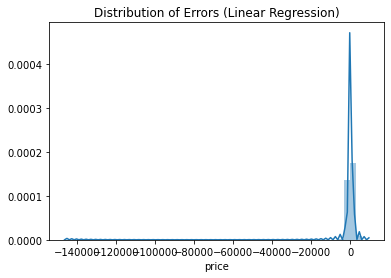

In [52]:
sns.distplot(Y_test - yhat_linear)
plt.title("Distribution of Errors (Linear Regression)")

In [53]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_mapped, Y_train)
yhat_predictions = tree_reg.predict(X_test)

In [54]:
error_metrics(Y_test,yhat_predictions)

('Mean Absolute Error: 355.38493756182',
 'Mean Square Error: 527199.991002617',
 'r2 score: 0.9672219051472435')

Text(0.5, 1.0, 'Distribution of Errors (Decision Tree Regressor)')

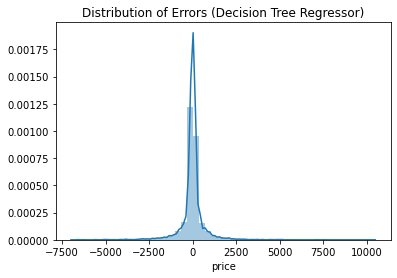

In [55]:
sns.distplot(Y_test - yhat_predictions)
plt.title("Distribution of Errors (Decision Tree Regressor)")

In [56]:
lasso = LassoCV()
lasso_fit = lasso.fit(X_train_mapped, Y_train)
yhat_lasso = lasso_fit.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3078166072.2821655, tolerance: 68375972.26946755
  model = cd_fast.enet_coordinate_descent(


In [57]:
error_metrics(Y_test, yhat_lasso)

('Mean Absolute Error: 868.5832311825927',
 'Mean Square Error: 3213544.4861606853',
 'r2 score: 0.8002013130148083')

Text(0.5, 1.0, 'Distribution of Errors (LASSO Regression)')

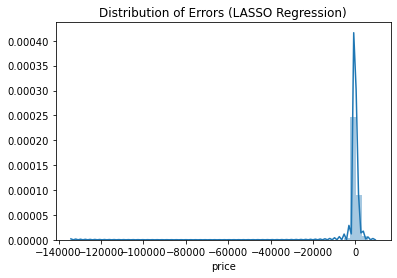

In [58]:
sns.distplot(Y_test - yhat_lasso)
plt.title("Distribution of Errors (LASSO Regression)")

In [59]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_mapped, Y_train)
yhat_rf = forest_reg.predict(X_test)

In [60]:
error_metrics(Y_test, yhat_rf)

('Mean Absolute Error: 278.96097870007304',
 'Mean Square Error: 300880.4214143632',
 'r2 score: 0.9812930820167476')

Text(0.5, 1.0, 'Distribution of Errors (Random Forest Regressor)')

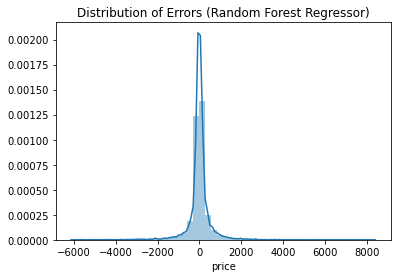

In [61]:
sns.distplot(Y_test - yhat_rf)
plt.title("Distribution of Errors (Random Forest Regressor)")